<a href="https://colab.research.google.com/github/nurfawa/FinalYearProject/blob/FinalYearProject/DataTypeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1: Test on Different Plaintext Data Type

Made by: Nur Fahima Iwani binti Ahmad Irwan (CS010181428)

Title: Investigating The Impact of Grover's Algorithm on AES's S-Box

#Step 1: Installing open source framework for programming quantum computers, Google Cirq

In [ ]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 765.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.8 MB/s eta

#Step 2: Installing Python package of low-level cryptographic primitives (Pycryptodome)

In [ ]:
!pip install PyCryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


#Test 1: Long textual data

Plaintext: "To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works.
AES uses a key to encrypt and decrypt data."

The size of the adjusted byte sequence is: 1024 bytes
Adjusted Byte Sequence:
b'To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data.To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data.To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data.To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data.To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data.To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt d

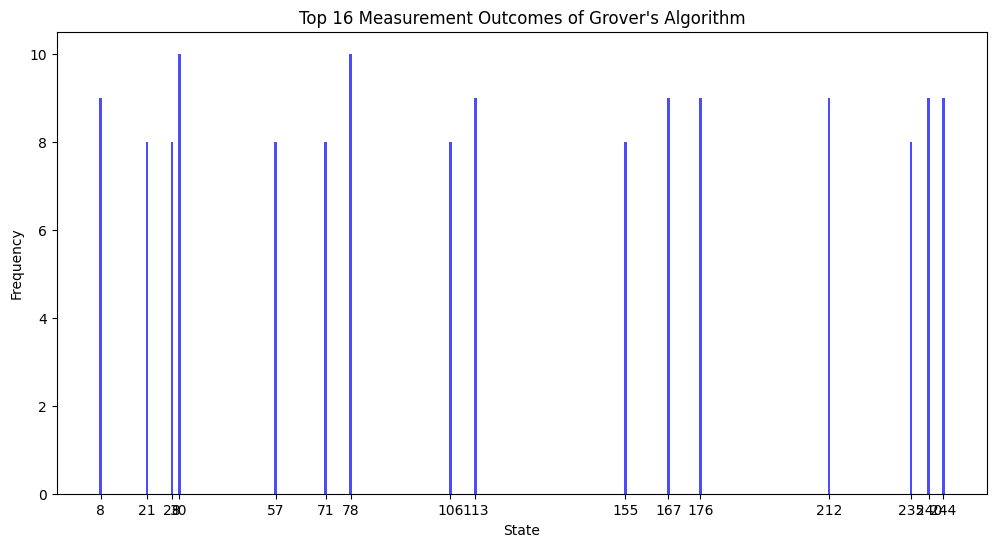

Number of Qubits: 8
Number of Gates: 329
Number of Iterations: 12
Memory Usage: 1.00 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES

# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def log_circuit_info(circuit, execution_time):
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Execution Time: {execution_time:.4f} seconds")

def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def adjust_bytes_to_1kb(byte_sequence):
    """
    Adjust the given byte sequence to be exactly 1KB (1024 bytes) in size.

    Args:
    byte_sequence (bytes): The input byte sequence.

    Returns:
    bytes: The adjusted byte sequence of 1KB in size.
    """
    # Calculate the current size of the byte sequence
    current_size = len(byte_sequence)

    # If the current size is already 1KB, return the byte sequence
    if current_size == 1024:
        return byte_sequence

    # If the current size is greater than 1KB, trim the byte sequence
    if current_size > 1024:
        return byte_sequence[:1024]

    # If the current size is less than 1KB, repeat the byte sequence until it exceeds 1KB
    while current_size < 1024:
        byte_sequence += byte_sequence
        current_size = len(byte_sequence)

    # Trim the byte sequence to exactly 1KB
    adjusted_byte_sequence = byte_sequence[:1024]

    return adjusted_byte_sequence

# Given byte sequence
byte_sequence = b"""To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data."""

# Adjust the byte sequence to 1KB
adjusted_byte_sequence = adjust_bytes_to_1kb(byte_sequence)
print(f"The size of the adjusted byte sequence is: {len(adjusted_byte_sequence)} bytes")
print(f"Adjusted Byte Sequence:\n{adjusted_byte_sequence}")

def main():
    secret_key = b'nur fahima iwani'
    plaintext = b"""To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works. AES uses a key to encrypt and decrypt data."""
    initial_memory = get_memory_usage()
     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)
    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")

if __name__ == "__main__":
    main()


#Classical AES S-Box Algorithm for Test 1

In [ ]:


# AES S-box and inverse S-box
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

sboxInv = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
]

def subBytes(state):
    """Apply the SubBytes step using the AES S-box."""
    for i in range(len(state)):
        state[i] = sbox[state[i]]

def subBytesInv(state):
    """Apply the inverse SubBytes step using the inverse AES S-box."""
    for i in range(len(state)):
        state[i] = sboxInv[state[i]]

def plaintext_to_state(plaintext):
    """Convert plaintext string to state array."""
    return [ord(char) for char in plaintext]

# Input plaintext here
plaintext = """To understand why AES is vulnerable to quantum attacks, it is important to understand how the algorithm works.
AES uses a key to encrypt and decrypt data."""  # put anything you want as the plaintext
state = plaintext_to_state(plaintext)
print("Original state:", state)
subBytes(state)
print("After SubBytes:", state)
subBytesInv(state)
print("After inverse SubBytes (original state restored):", state)


Original state: [84, 111, 32, 117, 110, 100, 101, 114, 115, 116, 97, 110, 100, 32, 119, 104, 121, 32, 65, 69, 83, 32, 105, 115, 32, 118, 117, 108, 110, 101, 114, 97, 98, 108, 101, 32, 116, 111, 32, 113, 117, 97, 110, 116, 117, 109, 32, 97, 116, 116, 97, 99, 107, 115, 44, 32, 105, 116, 32, 105, 115, 32, 105, 109, 112, 111, 114, 116, 97, 110, 116, 32, 116, 111, 32, 117, 110, 100, 101, 114, 115, 116, 97, 110, 100, 32, 104, 111, 119, 32, 116, 104, 101, 32, 97, 108, 103, 111, 114, 105, 116, 104, 109, 32, 119, 111, 114, 107, 115, 46, 10, 65, 69, 83, 32, 117, 115, 101, 115, 32, 97, 32, 107, 101, 121, 32, 116, 111, 32, 101, 110, 99, 114, 121, 112, 116, 32, 97, 110, 100, 32, 100, 101, 99, 114, 121, 112, 116, 32, 100, 97, 116, 97, 46]
After SubBytes: [32, 168, 183, 157, 159, 67, 77, 64, 143, 146, 239, 159, 67, 183, 245, 69, 182, 183, 131, 110, 237, 183, 249, 143, 183, 56, 157, 80, 159, 77, 64, 239, 170, 80, 77, 183, 146, 168, 183, 163, 157, 239, 159, 146, 157, 60, 183, 239, 146, 146, 239, 251, 1

#Test 2: Binary data

plaintext: bytes([0x81, 0x04, 0x1E, 0x81, 0xFA, 0xC0, 0x3E, 0x85, 0xA5, 0xCB, 0x96, 0x8C, 0x5B, 0xD0, 0xFE, 0x80])



The size of the adjusted byte sequence is: 1024 bytes
Adjusted Byte Sequence:
b'\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0\xfe\x80\x81\x04\x1e\x81\xfa\xc0>\x85\xa5\xcb\x96\x8c[\xd0

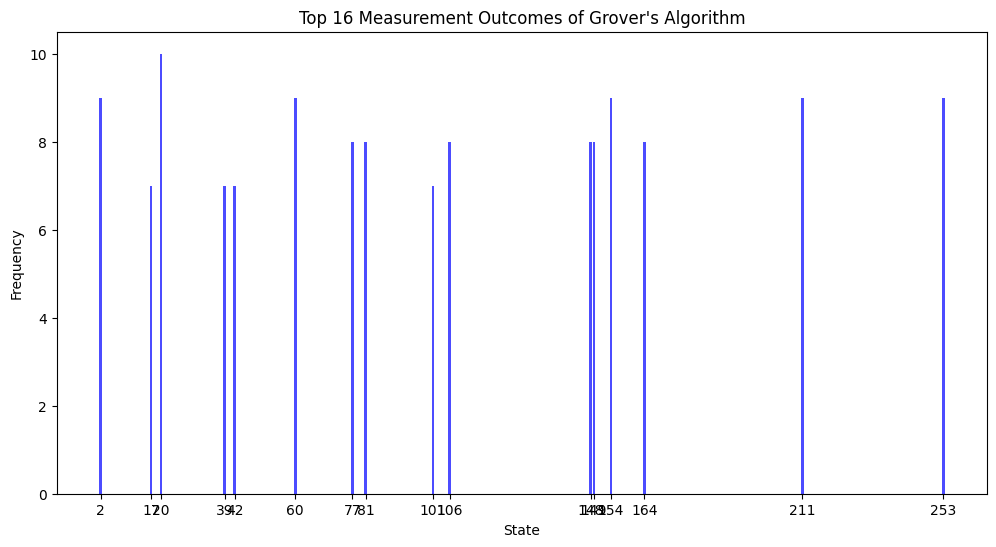

Number of Qubits: 8
Number of Gates: 329
Number of Iterations: 12
Memory Usage: 0.27 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES

# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def log_circuit_info(circuit, execution_time):
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Execution Time: {execution_time:.4f} seconds")

def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def adjust_bytes_to_1kb(byte_sequence):
    """
    Adjust the given byte sequence to be exactly 1KB (1024 bytes) in size.

    Args:
    byte_sequence (bytes): The input byte sequence.

    Returns:
    bytes: The adjusted byte sequence of 1KB in size.
    """
    # Calculate the current size of the byte sequence
    current_size = len(byte_sequence)

    # If the current size is already 1KB, return the byte sequence
    if current_size == 1024:
        return byte_sequence

    # If the current size is greater than 1KB, trim the byte sequence
    if current_size > 1024:
        return byte_sequence[:1024]

    # If the current size is less than 1KB, repeat the byte sequence until it exceeds 1KB
    while current_size < 1024:
        byte_sequence += byte_sequence
        current_size = len(byte_sequence)

    # Trim the byte sequence to exactly 1KB
    adjusted_byte_sequence = byte_sequence[:1024]

    return adjusted_byte_sequence

# Given byte sequence
byte_sequence = bytes([0x81, 0x04, 0x1E, 0x81, 0xFA, 0xC0, 0x3E, 0x85, 0xA5, 0xCB, 0x96, 0x8C, 0x5B, 0xD0, 0xFE, 0x80])

# Adjust the byte sequence to 1KB
adjusted_byte_sequence = adjust_bytes_to_1kb(byte_sequence)
print(f"The size of the adjusted byte sequence is: {len(adjusted_byte_sequence)} bytes")
print(f"Adjusted Byte Sequence:\n{adjusted_byte_sequence}")



def main():
    secret_key = b'nur fahima iwani'
    plaintext = bytes([0x81, 0x04, 0x1E, 0x81, 0xFA, 0xC0, 0x3E, 0x85, 0xA5, 0xCB, 0x96, 0x8C, 0x5B, 0xD0, 0xFE, 0x80])

    initial_memory = get_memory_usage()
     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [12, 242, 114, 12, 45, 186, 178, 151, 6, 31, 144, 100, 57, 112, 187, 205]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)
    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


In [ ]:


# AES S-box and inverse S-box
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

sboxInv = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
]

def subBytes(state):
    """Apply the SubBytes step using the AES S-box."""
    for i in range(len(state)):
        state[i] = sbox[state[i]]

def subBytesInv(state):
    """Apply the inverse SubBytes step using the inverse AES S-box."""
    for i in range(len(state)):
        state[i] = sboxInv[state[i]]

def plaintext_to_state(plaintext):
    """Convert plaintext to a state array."""
    state = list(plaintext)
    return state

# Input plaintext

plaintext = bytes([0x81, 0x04, 0x1E, 0x81, 0xFA, 0xC0, 0x3E, 0x85, 0xA5, 0xCB, 0x96, 0x8C, 0x5B, 0xD0, 0xFE, 0x80]) # put anything you want as the plaintext
state = plaintext_to_state(plaintext)
print("Original state:", state)
subBytes(state)
print("After SubBytes:", state)
subBytesInv(state)
print("After inverse SubBytes (original state restored):", state)


Original state: [129, 4, 30, 129, 250, 192, 62, 133, 165, 203, 150, 140, 91, 208, 254, 128]
After SubBytes: [12, 242, 114, 12, 45, 186, 178, 151, 6, 31, 144, 100, 57, 112, 187, 205]
After inverse SubBytes (original state restored): [129, 4, 30, 129, 250, 192, 62, 133, 165, 203, 150, 140, 91, 208, 254, 128]


#Test 3: Numerical data

plaintext: bytes([0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF, 0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF])

Hexadecimal Representation:

*   0x01: 1 in decimal
*   0x23: 35 in decimal
*   0x45: 69 in decimal
*   0x67: 103 in decimal
*   0x89: 137 in decimal
*   0xAB: 171 in decimal
*   0xCD: 205 in decimal
*   0xEF: 239 in decimal



The size of the adjusted byte sequence is: 1024 bytes
Adjusted Byte Sequence:
b'\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef\x01#Eg\x89\xab\xcd\xef

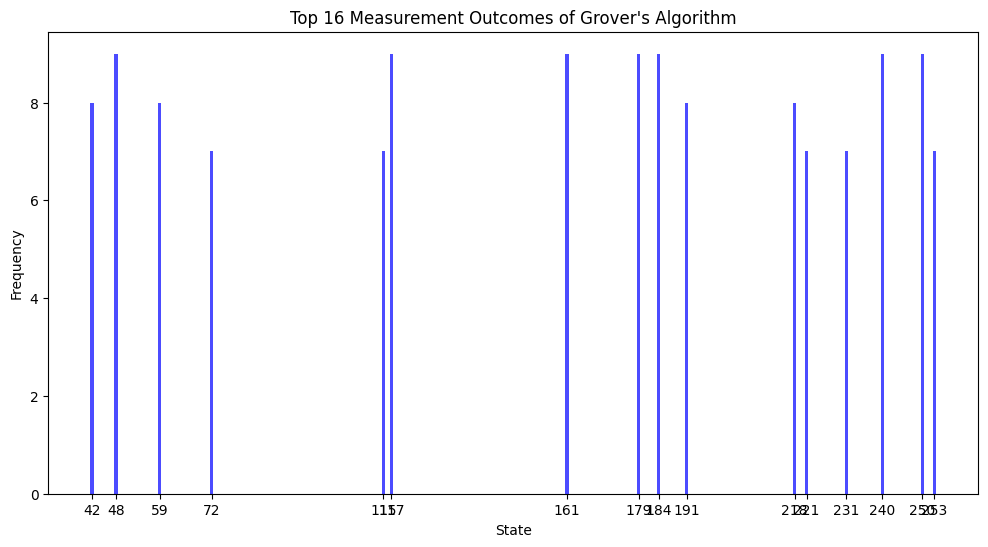

Number of Qubits: 8
Number of Gates: 353
Number of Iterations: 12
Memory Usage: 0.00 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES

# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def log_circuit_info(circuit, execution_time):
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Execution Time: {execution_time:.4f} seconds")

def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def adjust_bytes_to_1kb(byte_sequence):
    """
    Adjust the given byte sequence to be exactly 1KB (1024 bytes) in size.

    Args:
    byte_sequence (bytes): The input byte sequence.

    Returns:
    bytes: The adjusted byte sequence of 1KB in size.
    """
    # Calculate the current size of the byte sequence
    current_size = len(byte_sequence)

    # If the current size is already 1KB, return the byte sequence
    if current_size == 1024:
        return byte_sequence

    # If the current size is greater than 1KB, trim the byte sequence
    if current_size > 1024:
        return byte_sequence[:1024]

    # If the current size is less than 1KB, repeat the byte sequence until it exceeds 1KB
    while current_size < 1024:
        byte_sequence += byte_sequence
        current_size = len(byte_sequence)

    # Trim the byte sequence to exactly 1KB
    adjusted_byte_sequence = byte_sequence[:1024]

    return adjusted_byte_sequence

# Given byte sequence
byte_sequence = bytes([0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF, 0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF])

# Adjust the byte sequence to 1KB
adjusted_byte_sequence = adjust_bytes_to_1kb(byte_sequence)
print(f"The size of the adjusted byte sequence is: {len(adjusted_byte_sequence)} bytes")
print(f"Adjusted Byte Sequence:\n{adjusted_byte_sequence}")


def main():
    secret_key = b'nur fahima iwani'
    plaintext = bytes([0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF, 0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF])

    initial_memory = get_memory_usage()
     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)
    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


In [ ]:


# AES S-box and inverse S-box
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

sboxInv = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
]

def subBytes(state):
    """Apply the SubBytes step using the AES S-box."""
    for i in range(len(state)):
        state[i] = sbox[state[i]]

def subBytesInv(state):
    """Apply the inverse SubBytes step using the inverse AES S-box."""
    for i in range(len(state)):
        state[i] = sboxInv[state[i]]

def plaintext_to_state(plaintext):
    """Convert plaintext to a state array."""
    state = list(plaintext)
    return state

# Input plaintext

plaintext = bytes([0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF, 0x01, 0x23, 0x45, 0x67, 0x89, 0xAB, 0xCD, 0xEF]) # put anything you want as the plaintext
state = plaintext_to_state(plaintext)
print("Original state:", state)
subBytes(state)
print("After SubBytes:", state)
subBytesInv(state)
print("After inverse SubBytes (original state restored):", state)


Original state: [1, 35, 69, 103, 137, 171, 205, 239, 1, 35, 69, 103, 137, 171, 205, 239]
After SubBytes: [124, 38, 110, 133, 167, 98, 189, 223, 124, 38, 110, 133, 167, 98, 189, 223]
After inverse SubBytes (original state restored): [1, 35, 69, 103, 137, 171, 205, 239, 1, 35, 69, 103, 137, 171, 205, 239]


#Test 4: Mixed data



---

Plaintext: bytes([0x48, 0x65, 0x6C, 0x6C, 0x6F, 0x2C, 0x20, 0x57, 0x6F, 0x72, 0x6C, 0x64, 0x21, 0x01, 0x02, 0x03])

ASCII Characters:
*   0x48: 'H'
*   0x65: 'e'
*   0x6C: 'l'
*   0x6C: 'l'
*   0x6F: 'o'
*   0x2C: ','
*   0x20: ' '
*   0x57: 'W'
*   0x6F: 'o'
*   0x72: 'r'
*   0x6C: 'l'
*   0x64: 'd'
*   0x21: '!'

The first part of this byte sequence represents the ASCII characters for the string "Hello, World!".

Binary Data:
*  0x01: 1 in decimal
*  0x02: 2 in decimal
*  0x03: 3 in decimal

Textual Data: 'H', 'e', 'l', 'l', 'o', ',', ' ', 'W', 'o', 'r', 'l', 'd', '!'

Binary Data: 0x01, 0x02, 0x03







The size of the adjusted byte sequence is: 1024 bytes
Adjusted Byte Sequence:
b'Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x02\x03Hello, World!\x01\x0

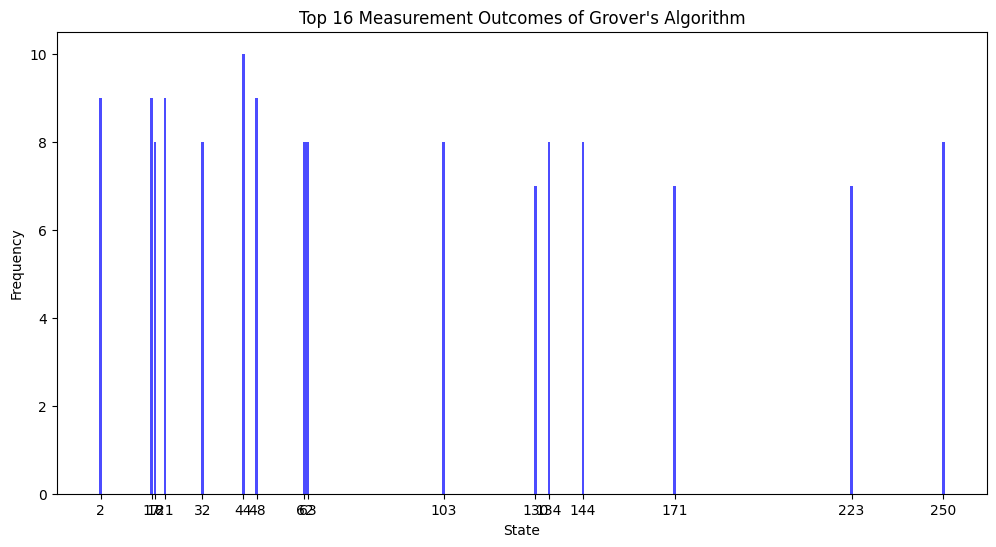

Number of Qubits: 8
Number of Gates: 353
Number of Iterations: 12
Memory Usage: 0.00 MB
Circuit Depth: 75
Feasibility: Not Feasible
Vulnerability Insights: Low


In [ ]:
import cirq
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from collections import Counter
import math
import time
import psutil
from Crypto.Cipher import AES

# Constants
AES_BLOCK_SIZE = 16
AES_MODE = AES.MODE_CBC

# AES S-box flattened
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def lookup(byte):
    """Return S-box transformation of a byte."""
    return SBOX[byte]

def optimal_iterations(n):
    """Calculate the optimal number of iterations for Grover's algorithm."""
    return int(math.pi / 4 * math.sqrt(2 ** n))

def simulate_sbox(plaintext_bytes):
    """Apply the AES S-box to each byte of the plaintext."""
    return [SBOX[byte] for byte in plaintext_bytes]

def setup_aes_cipher(secret_key):
    """Setup AES cipher with CBC mode and random IV."""
    key_hash = hashlib.sha256(secret_key).digest()
    iv = os.urandom(AES_BLOCK_SIZE)
    cipher = AES.new(key_hash, AES_MODE, iv=iv)
    return cipher, iv

def encrypt_message(cipher, plaintext):
    """Encrypt the message using AES."""
    if len(plaintext) % AES_BLOCK_SIZE != 0:
        padding_length = AES_BLOCK_SIZE - len(plaintext) % AES_BLOCK_SIZE
        plaintext += bytes([padding_length] * padding_length)
    return cipher.encrypt(plaintext)

def sbox_oracle(circuit, qubits, target_output):
    """Define Grover's oracle using the S-box."""
    for input_value in range(256):
        sbox_output = lookup(input_value)
        if sbox_output == target_output:
            binary_input = format(input_value, '08b')
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))
            # Toffoli gate implementation
            circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
            for i, bit in enumerate(binary_input):
                if bit == '0':
                    circuit.append(cirq.X(qubits[i]))

def apply_diffusion_operator(circuit, qubits):
    """Apply the diffusion operator (inversion about the mean)."""
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.X.on_each(*qubits))

def setup_quantum_circuit(num_qubits, target_output, iterations):
    """Setup the quantum circuit for Grover's algorithm."""
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()
    # Initialize qubits to |-> state
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    iterations = optimal_iterations(num_qubits)
    for _ in range(iterations):
        sbox_oracle(circuit, qubits, target_output)
        apply_diffusion_operator(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def log_circuit_info(circuit, execution_time):
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Execution Time: {execution_time:.4f} seconds")

def get_memory_usage():
    """Return the current memory usage of the process."""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def calculate_circuit_depth(circuit):
    """Calculate and return the depth of the quantum circuit."""
    depth = 0
    for moment in circuit:
        depth += 1
    return depth

def count_gates(circuit):
    """Count the number of X, H, CX, CCX, and other gates in the circuit."""
    gate_counts = {
        'X': 0,
        'H': 0,
        'CX': 0,
        'CCX': 0,
        'Other': 0
    }

    for moment in circuit:
        for op in moment.operations:
            if isinstance(op.gate, cirq.XPowGate):
                gate_counts['X'] += 1
            elif isinstance(op.gate, cirq.HPowGate):
                gate_counts['H'] += 1
            elif isinstance(op.gate, cirq.CNotPowGate):
                gate_counts['CX'] += 1
            elif isinstance(op.gate, cirq.CCXPowGate):
                gate_counts['CCX'] += 1
            else:
                gate_counts['Other'] += 1

    return gate_counts

def adjust_bytes_to_1kb(byte_sequence):
    """
    Adjust the given byte sequence to be exactly 1KB (1024 bytes) in size.

    Args:
    byte_sequence (bytes): The input byte sequence.

    Returns:
    bytes: The adjusted byte sequence of 1KB in size.
    """
    # Calculate the current size of the byte sequence
    current_size = len(byte_sequence)

    # If the current size is already 1KB, return the byte sequence
    if current_size == 1024:
        return byte_sequence

    # If the current size is greater than 1KB, trim the byte sequence
    if current_size > 1024:
        return byte_sequence[:1024]

    # If the current size is less than 1KB, repeat the byte sequence until it exceeds 1KB
    while current_size < 1024:
        byte_sequence += byte_sequence
        current_size = len(byte_sequence)

    # Trim the byte sequence to exactly 1KB
    adjusted_byte_sequence = byte_sequence[:1024]

    return adjusted_byte_sequence

# Given byte sequence
byte_sequence = bytes([0x48, 0x65, 0x6C, 0x6C, 0x6F, 0x2C, 0x20, 0x57, 0x6F, 0x72, 0x6C, 0x64, 0x21, 0x01, 0x02, 0x03])

# Adjust the byte sequence to 1KB
adjusted_byte_sequence = adjust_bytes_to_1kb(byte_sequence)
print(f"The size of the adjusted byte sequence is: {len(adjusted_byte_sequence)} bytes")
print(f"Adjusted Byte Sequence:\n{adjusted_byte_sequence}")


def main():
    secret_key = b'nur fahima iwani'
    plaintext = bytes([0x48, 0x65, 0x6C, 0x6C, 0x6F, 0x2C, 0x20, 0x57, 0x6F, 0x72, 0x6C, 0x64, 0x21, 0x01, 0x02, 0x03])
    initial_memory = get_memory_usage()
     # Start measuring time
    total_start_time = time.time()

    cipher, iv = setup_aes_cipher(secret_key)
    encrypted_message = encrypt_message(cipher, plaintext)
    target_output = encrypted_message[0] % 256

    num_qubits = 8
    iterations = optimal_iterations(num_qubits)
    start_time = time.time()
    circuit, qubits = setup_quantum_circuit(num_qubits, target_output, iterations)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    end_time = time.time()

    # End measuring time
    total_end_time = time.time()

    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory

    execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
    total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds

    circuit_depth = calculate_circuit_depth(circuit)
    gate_counts = count_gates(circuit)

    plaintext_bytes = list(plaintext)
    actual_sbox_output = simulate_sbox(plaintext_bytes)
    expected_sbox_output = [lookup(byte) for byte in plaintext_bytes[:16]]  # Adjust as needed

    print("Original plaintext bytes:", plaintext_bytes[:16])
    print("Actual S-box output:", actual_sbox_output[:16])
    print("Expected S-box output:", expected_sbox_output)
    if actual_sbox_output[:16] == expected_sbox_output:
        print("Success: Quantum result matches classical S-box output.")
    else:
        print("Mismatch: Quantum result does not match classical S-box output.")
    print("Circuit Depth:", circuit_depth)
    print("Gate Counts:", gate_counts)
    print("Circuit:\n", circuit)
    print("Results:\n", result.histogram(key='result'))

    print(f"Total Execution Time: {total_execution_time:.2f} ms")
    print(f"Grover's Algorithm Execution Time: {execution_time:.2f} ms")

    plot_results(result)
    log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth)

def plot_results(result):
    """Plot the histogram of measurement outcomes."""
    measurements = result.measurements['result']
    values = [sum(bit << i for i, bit in enumerate(measurement)) for measurement in measurements]
    counts = Counter(values)
    top_16 = counts.most_common(16)

    states, frequencies = zip(*top_16)
    plt.figure(figsize=(12, 6))
    plt.bar(states, frequencies, align='center', alpha=0.7, color='b')
    plt.xticks(states)
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title("Top 16 Measurement Outcomes of Grover's Algorithm")
    plt.show()

def log_circuit_info(circuit, execution_time, iterations, memory_usage, circuit_depth):
    """Log the information about the quantum circuit."""
    num_qubits = len(circuit.all_qubits())
    num_gates = sum(1 for _ in circuit.all_operations())  # Convert generator to a count

    # Feasibility Analysis
    feasible = num_qubits <= 20 and execution_time < 1  # Example criteria

    # Vulnerability Insights
    classical_time = 2 ** 8  # For 8-bit search space
    quantum_time = iterations * execution_time
    speedup = classical_time / quantum_time
    vulnerability = "High" if speedup > 100 else "Moderate" if speedup > 10 else "Low"

    print(f"Number of Qubits: {num_qubits}")
    print(f"Number of Gates: {num_gates}")
    print(f"Number of Iterations: {iterations}")
    print(f"Memory Usage: {memory_usage / (1024 ** 2):.2f} MB")
    print(f"Circuit Depth: {circuit_depth}")
    print(f"Feasibility: {'Feasible' if feasible else 'Not Feasible'}")
    print(f"Vulnerability Insights: {vulnerability}")


if __name__ == "__main__":
    main()


In [ ]:
# AES S-box and inverse S-box
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

sboxInv = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
]

def subBytes(state):
    """Apply the SubBytes step using the AES S-box."""
    for i in range(len(state)):
        state[i] = sbox[state[i]]

def subBytesInv(state):
    """Apply the inverse SubBytes step using the inverse AES S-box."""
    for i in range(len(state)):
        state[i] = sboxInv[state[i]]

def plaintext_to_state(plaintext):
    """Convert plaintext to a state array."""
    state = list(plaintext)
    return state

# Input plaintext

plaintext = bytes([0x48, 0x65, 0x6C, 0x6C, 0x6F, 0x2C, 0x20, 0x57, 0x6F, 0x72, 0x6C, 0x64, 0x21, 0x01, 0x02, 0x03]) # put anything you want as the plaintext
state = plaintext_to_state(plaintext)
print("Original state:", state)
subBytes(state)
print("After SubBytes:", state)
subBytesInv(state)
print("After inverse SubBytes (original state restored):", state)

# Start measuring time
total_start_time = time.time()
# End measuring time
total_end_time = time.time()

total_execution_time = (total_end_time - total_start_time) * 1000  # Convert to milliseconds
print(f"Total Execution Time: {total_execution_time:.2f} ms")



Original state: [72, 101, 108, 108, 111, 44, 32, 87, 111, 114, 108, 100, 33, 1, 2, 3]
After SubBytes: [82, 77, 80, 80, 168, 113, 183, 91, 168, 64, 80, 67, 253, 124, 119, 123]
After inverse SubBytes (original state restored): [72, 101, 108, 108, 111, 44, 32, 87, 111, 114, 108, 100, 33, 1, 2, 3]
Total Execution Time: 0.05 ms
